# Crop Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\D_and_I\train_data.csv")

In [3]:
df.head()

,Temperature,Rainfall,Humidity,Moisture,Crop
0,23,221,79,397,Rice
1,16,86,85,625,Tomato
2,23,68,51,421,Wheat
3,15,47,62,422,Barley
4,26,91,32,367,chile


In [4]:
df.describe()

,Temperature,Rainfall,Humidity,Moisture
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,19.757000,115.32190,61.495700,427.205800
std,5.118454,81.60272,16.511204,73.558212
min,5.000000,30.00000,30.000000,300.000000
25%,16.000000,50.00000,52.000000,390.000000
50%,21.000000,91.00000,63.000000,412.000000
75%,24.000000,129.00000,75.000000,437.000000
max,27.000000,350.00000,90.000000,650.000000


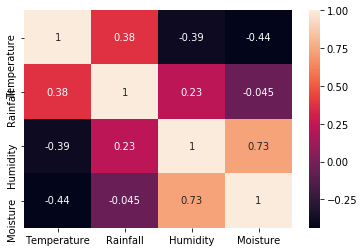

In [5]:
sns.heatmap(df[["Temperature","Rainfall","Humidity","Moisture"]].corr(),annot=True)

C:\Users\IITS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


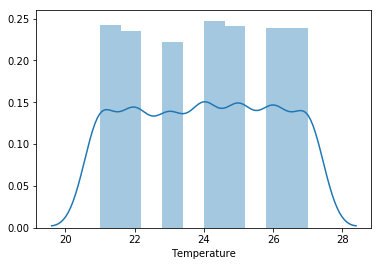

In [6]:
sns.distplot(df["Temperature"][(df["Crop"]=="Rice")])

C:\Users\IITS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


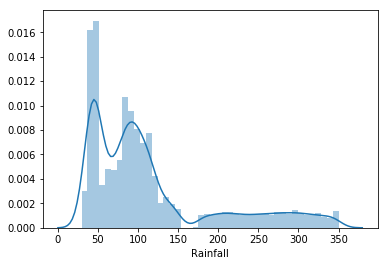

In [7]:
sns.distplot(df["Rainfall"])

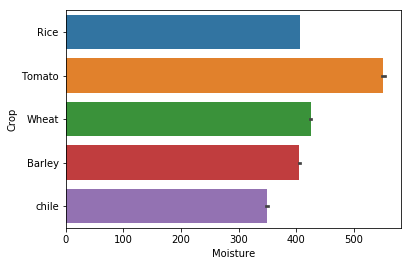

In [8]:
sns.barplot(x = "Moisture", y = "Crop",data = df)

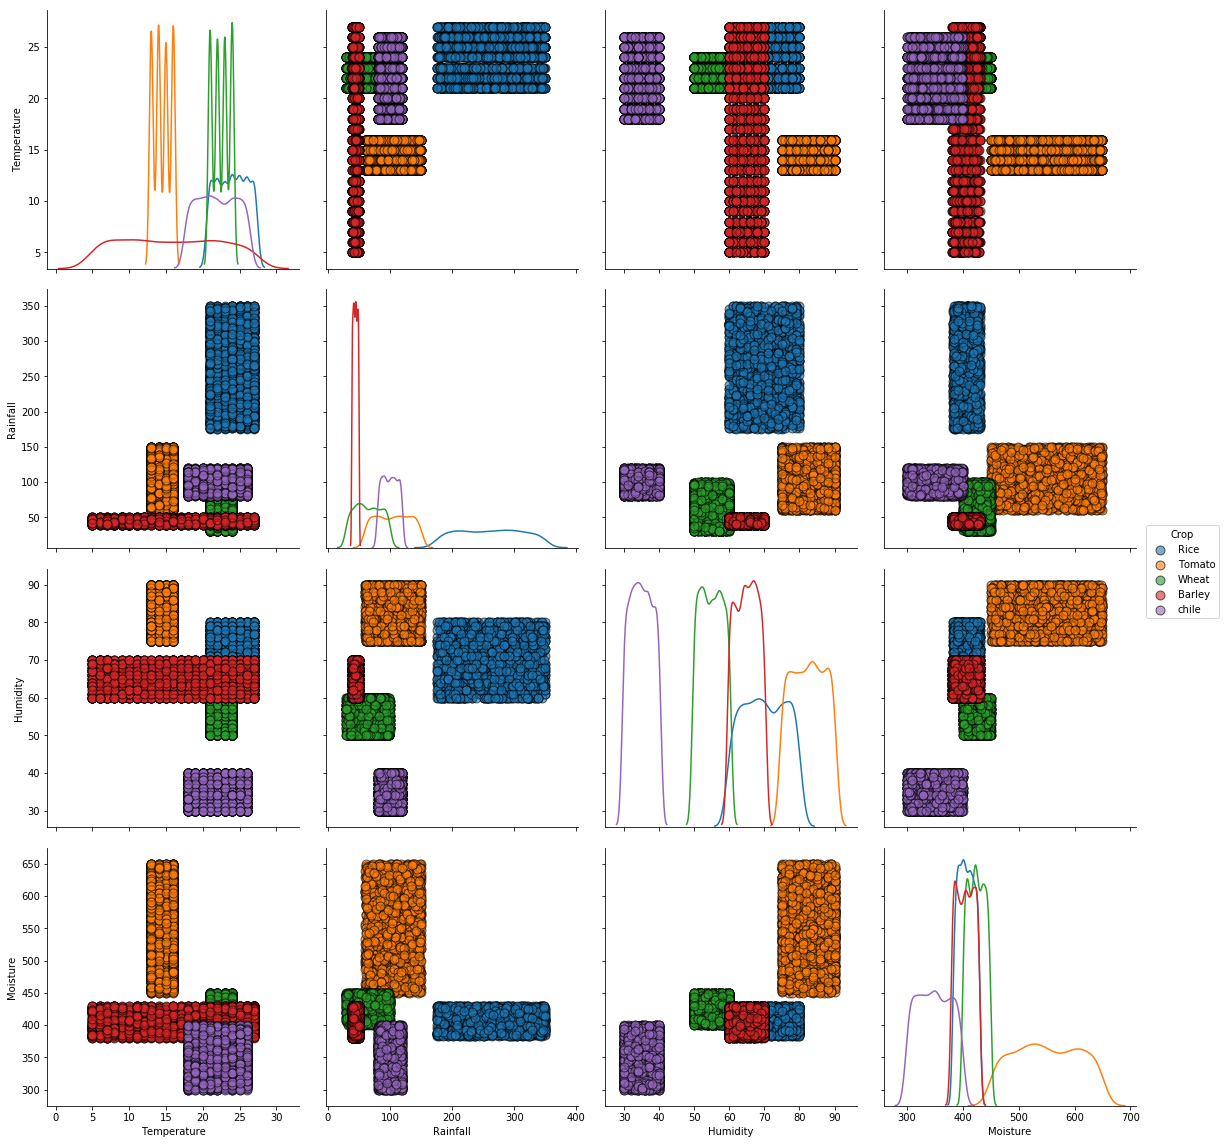

In [9]:
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [10]:
cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
log_fit = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(pred)

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Tomato' 'Tomato' 'Barley' ... 'Tomato' 'Rice' 'Barley']


In [13]:
accuracy = clf.score(X_test,y_test)
print(accuracy*100)

95.66666666666667


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred,labels = ["Rice","Wheat","Barley","Tomato","Chile"])

array([[663,   0,   0,   0,   0],
       [  0, 603,  26,   2,   0],
       [  0,  27, 645,  38,   0],
       [  0,   2,  48, 616,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [25]:
prob_pred = clf.predict_proba(X_test)
print(prob_pred)

[[2.21545630e-001 1.60975434e-204 7.78102400e-001 3.51969622e-004
  2.16411664e-020]
 [7.25729709e-014 1.52033574e-080 9.99999985e-001 1.49370315e-008
  8.07889338e-011]
 [9.88728516e-001 4.20410816e-146 1.12696074e-002 1.87636016e-006
  1.31886343e-021]
 ...
 [8.11885335e-014 1.04021194e-106 9.99999828e-001 1.71686377e-007
  3.80309310e-011]
 [5.56205204e-132 1.00000000e+000 2.12542104e-103 1.75766802e-113
  1.64349980e-097]
 [9.15370068e-001 7.78788678e-151 8.46127496e-002 1.71826003e-005
  1.50296750e-019]]


In [50]:
classes = clf.classes_ 
print(classes)

['Barley' 'Rice' 'Tomato' 'Wheat' 'chile']


In [125]:
values = [[int(x) for x in input("Enter the Tempertature,Rainfall,Humidity,Moisture in order: ").split()]]

Enter the Tempertature,Rainfall,Humidity,Moisture in order: 23 221 79 397


In [144]:
lr_proba_predict = clf.predict_proba(values)
print(lr_proba_predict)

[[2.83595426e-132 1.00000000e+000 7.67296764e-024 1.16866740e-038
  1.93642319e-017]]


In [151]:
df_pred = pd.DataFrame(data = prob_pred, columns = ['Barley', 'Rice', 'Tomato', 'Wheat', 'Chile'])
df_pred.head()

,Barley,Rice,Tomato,Wheat,Chile
0,2.215456e-01,1.609754e-204,0.778102,3.519696e-04,2.164117e-20
1,7.257297e-14,1.520336e-80,1.000000,1.493703e-08,8.078893e-11
2,9.887285e-01,4.204108e-146,0.011270,1.876360e-06,1.318863e-21
3,7.764102e-14,2.185981e-83,0.000025,7.649190e-01,2.350560e-01
4,2.149914e-06,2.737763e-102,0.020391,9.796065e-01,2.907884e-07


In [55]:
clf.coef_

array([[-0.36727517, -0.89413421,  0.8745926 ,  0.16216333],
       [ 0.03297879,  2.187586  ,  0.09749624, -0.86505624],
       [-0.60861099, -0.5155338 ,  0.52919226,  0.1760214 ],
       [ 0.45860593, -0.58357805, -0.37001407,  0.26519763],
       [ 0.48430144, -0.19433994, -1.13126704,  0.26167387]])

In [119]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [120]:
kfold = StratifiedKFold(n_splits=10)
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  3.8min finished
C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9985074626865672

In [159]:
rfc_prob = gsRFC.predict_proba(values)
print(rfc_prob)

[[0. 1. 0. 0. 0.]]


In [131]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01],
                  'C': [1, 10, 50]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.1min finished
C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9977611940298508

In [153]:
svm_prob = gsSVMC.predict_proba(values)

In [133]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.01, 0.1, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:   14.8s finished
C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [154]:
ada_prob = gsadaDTC.predict_proba(values)

In [135]:
print(gsadaDTC.best_score_)

0.9983582089552239


[0.15854929 0.29537501 0.34832526 0.19775044]


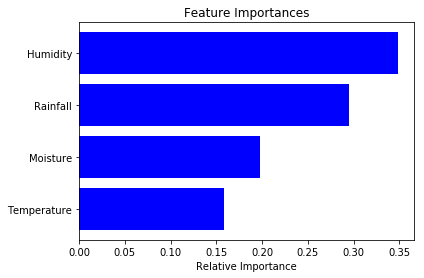

In [136]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = RFC_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[0.00363387 0.2642374  0.72918872 0.00294   ]


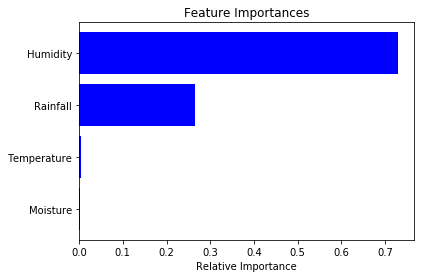

In [137]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = ada_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [138]:
from sklearn.neural_network import MLPClassifier

In [139]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(13,13,13), random_state=1)

In [140]:
clf.fit(X_train,y_train)

C:\Users\IITS\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [141]:
clf.predict(X_test)

array(['Tomato', 'Tomato', 'Barley', ..., 'Tomato', 'Rice', 'Barley'],
      dtype='<U6')

In [142]:
acc = clf.score(X_test,y_test)
print(acc*100)

96.7878787878788


In [155]:
ann_prob = clf.predict_proba(values)

In [160]:
final_prob = (lr_proba_predict + rfc_prob + svm_prob + ada_prob + ann_prob)/5
print(final_prob)

[[0.03785014 0.84826632 0.03802292 0.03791885 0.03794177]]


In [162]:
probabilities = np.ravel(final_prob)
d = {k:v for k,v in zip(classes,probabilities)}
print(d)

{'Barley': 0.03785014158498985, 'Rice': 0.8482663245728135, 'Tomato': 0.03802291840000668, 'Wheat': 0.037918850018360276, 'chile': 0.03794176542382963}


In [163]:
from operator import itemgetter
sort = sorted(d.items(), key=itemgetter(1),reverse = True)
crop = []
prob = []
for i,v in sort:
    crop.append(i.lower())
    prob.append(v)
final_d = {k:v for k,v in zip(crop,prob)}
print(final_d)

{'rice': 0.8482663245728135, 'tomato': 0.03802291840000668, 'chile': 0.03794176542382963, 'wheat': 0.037918850018360276, 'barley': 0.03785014158498985}


In [165]:
required = input("Enter the crop which you want to supply: ").lower()
if required == crop[0]:
    print(required+" crop can be grown")
elif required in crop[:3]:
    print("You can grown "+required+" crop. But it is preferred to grow "+crop[0])
elif required in crop[3:5]:
    print("Cannot grow "+required+" crop")
else:
    print("No such crop exists")

Enter the crop which you want to supply: tomato
You can grown tomato crop. But it is preferred to grow rice
